## Лабораторная работа 1
### Персептрон Розенблатта

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.models import Sequential
from keras.layers import Dense, Dropout
import numpy as np
import matplotlib.pyplot as plt
import random

2022-10-03 09:39:42.985653: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-10-03 09:39:43.694544: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-10-03 09:39:43.694583: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-10-03 09:39:43.836812: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2022-10-03 09:39:46.638868: W tensorflow/stream_executor/platform/de

In [70]:
X_train = np.array([[-2.8, -0.1], [4, 0.7], [3.4, 2.3], [0.8, -2.6], [1.6, -4.2], [1.2, 1.6]])
y_train = np.array([1, 0, 0, 1, 1, 1])

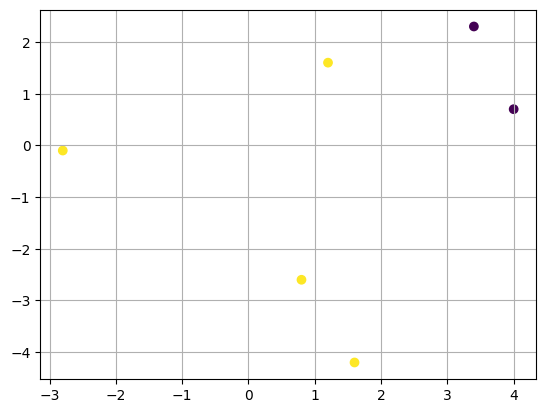

In [71]:
plt.grid()
plt.scatter([x[0] for x in X_train], [x[1] for x in X_train],c = y_train)

In [134]:
perceptron = keras.Sequential([
        layers.Dense(1,input_dim=2, activation="sigmoid", name="sigmoid"),
    ]
)

In [135]:
opt = keras.optimizers.Adam(learning_rate=0.1)
perceptron.compile(loss='mse', optimizer=opt, metrics=['mae'])


In [136]:
perceptron.fit(X_train, y_train, batch_size=1, epochs=50)

Epoch 1/50
6/6 [==============================] - 0s 2ms/step - loss: 0.3770 - mae: 0.4490
Epoch 2/50
6/6 [==============================] - 0s 3ms/step - loss: 0.2838 - mae: 0.4133
Epoch 3/50
6/6 [==============================] - 0s 4ms/step - loss: 0.1342 - mae: 0.3110
Epoch 4/50
6/6 [==============================] - 0s 4ms/step - loss: 0.1013 - mae: 0.2985
Epoch 5/50
6/6 [==============================] - 0s 3ms/step - loss: 0.0649 - mae: 0.2051
Epoch 6/50
6/6 [==============================] - 0s 4ms/step - loss: 0.0613 - mae: 0.1719
Epoch 7/50
6/6 [==============================] - 0s 4ms/step - loss: 0.0616 - mae: 0.1539
Epoch 8/50
6/6 [==============================] - 0s 4ms/step - loss: 0.0540 - mae: 0.1412
Epoch 9/50
6/6 [==============================] - 0s 4ms/step - loss: 0.0584 - mae: 0.1648
Epoch 10/50
6/6 [==============================] - 0s 4ms/step - loss: 0.0395 - mae: 0.1479
Epoch 11/50
6/6 [==============================] - 0s 3ms/step - loss: 0.0367 - mae: 0.14

In [137]:
weights = perceptron.layers[0].get_weights()
print(weights)

[array([[-1.8253213 ],
       [-0.32543775]], dtype=float32), array([4.5405784], dtype=float32)]


In [138]:
f = lambda x: (weights[0][0]*x  + weights[1][0]) / -weights[0][1]

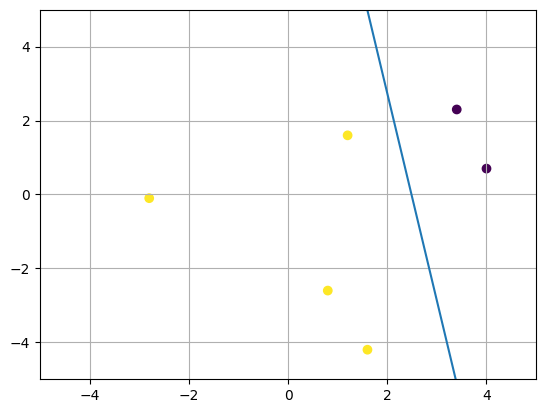

In [139]:
plt.grid()
plt.scatter([x[0] for x in X_train], [x[1] for x in X_train],c = y_train)
plt.ylim(-5,5)
plt.xlim(-5,5)
plt.plot([-6,6], [f(-6),f(6)])

In [144]:
rand_x = np.random.rand(30,2)*10-5
print(rand_x)

[[-0.99018247 -0.55431581]
 [-2.26986409 -4.09207171]
 [-1.68302104 -1.52811858]
 [-4.10150758 -4.2897809 ]
 [ 1.13830359 -0.09912333]
 [-2.3401102   2.77961812]
 [-2.4365763  -2.94285683]
 [ 3.34980048 -3.75847909]
 [-4.51656072 -3.87651889]
 [ 1.07044167  0.43534694]
 [ 0.88349206 -0.6077919 ]
 [ 4.11145481 -1.58040192]
 [ 0.7571851   0.12368443]
 [ 1.23477819 -2.27302818]
 [ 3.93686357  4.3714442 ]
 [ 2.47316372  3.06379248]
 [ 0.11757461 -4.63632367]
 [-3.41499913  2.16288663]
 [-3.53197122 -2.0513748 ]
 [ 4.48642085 -2.85913097]
 [-2.55083331  0.02171056]
 [-1.58543967  3.23100427]
 [ 1.41372987  1.67844203]
 [ 0.47593526 -4.74029522]
 [ 1.41953295 -3.1595371 ]
 [ 2.21561205  0.82433428]
 [ 0.74934929 -4.12415291]
 [-3.89806971  1.37660816]
 [-1.21742336  3.91368443]
 [-3.73026616  1.49464161]]


In [145]:
pred_rand = [int(p[0] > 0.5) for p in perceptron.predict(rand_x)]

1/1 [==============================] - 0s 29ms/step


In [146]:
pred_rand

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1]

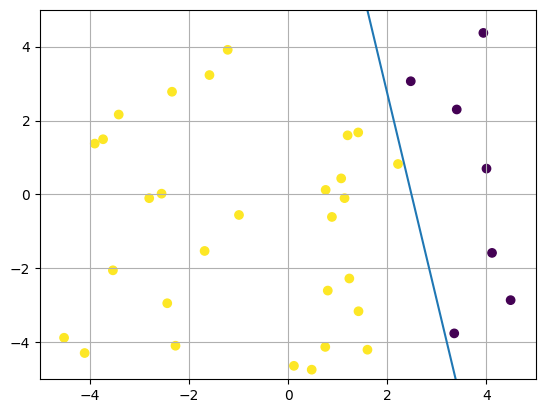

In [147]:
plt.grid()
plt.scatter([x[0] for x in X_train], [x[1] for x in X_train],c = y_train)
plt.scatter([x[0] for x in rand_x], [x[1] for x in rand_x],c = pred_rand)
plt.ylim(-5,5)
plt.xlim(-5,5)
plt.plot([-6,6], [f(-6),f(6)])

In [174]:
non_lin_x = np.random.rand(300,2)*10-5
non_lin_y = np.array([int(-2.5 < x[0] < 2.5 and -2.5 < x[1] < 2.5) for x in non_lin_x])

In [175]:
print(len(non_lin_y))

300


(-5.0, 5.0)

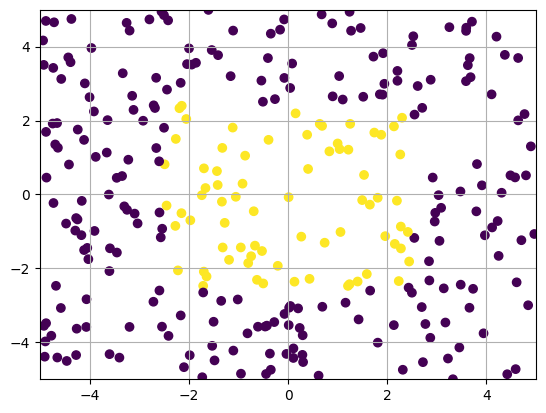

In [177]:
plt.grid()
plt.scatter([x[0] for x in non_lin_x], [x[1] for x in non_lin_x],c = non_lin_y)
plt.ylim(-5,5)
plt.xlim(-5,5)

In [178]:
perceptron_non_lin = keras.Sequential([
        layers.Dense(1,input_dim=2, activation="sigmoid", name="sigmoid"),
    ]
)

In [179]:
opt = keras.optimizers.Adam(learning_rate=0.1)
perceptron_non_lin.compile(loss='mse', optimizer=opt, metrics=['mae'])

In [180]:
perceptron_non_lin.fit(non_lin_x, non_lin_y, batch_size=1, epochs=50)

Epoch 1/50
300/300 [==============================] - 1s 2ms/step - loss: 0.2629 - mae: 0.4060
Epoch 2/50
300/300 [==============================] - 1s 2ms/step - loss: 0.2024 - mae: 0.3570
Epoch 3/50
300/300 [==============================] - 1s 2ms/step - loss: 0.2153 - mae: 0.3686
Epoch 4/50
300/300 [==============================] - 1s 2ms/step - loss: 0.2134 - mae: 0.3611
Epoch 5/50
300/300 [==============================] - 1s 2ms/step - loss: 0.2133 - mae: 0.3596
Epoch 6/50
300/300 [==============================] - 1s 2ms/step - loss: 0.2112 - mae: 0.3582
Epoch 7/50
300/300 [==============================] - 1s 2ms/step - loss: 0.2148 - mae: 0.3652
Epoch 8/50
300/300 [==============================] - 1s 2ms/step - loss: 0.2107 - mae: 0.3700
Epoch 9/50
300/300 [==============================] - 1s 3ms/step - loss: 0.2089 - mae: 0.3476
Epoch 10/50
300/300 [==============================] - 1s 4ms/step - loss: 0.2208 - mae: 0.3651
Epoch 11/50
300/300 [============================

In [181]:
weights = perceptron.layers[0].get_weights()
f = lambda x: (weights[0][0]*x  + weights[1][0]) / -weights[0][1]

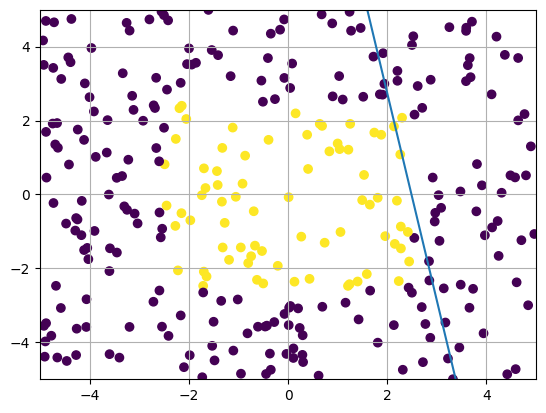

In [182]:
plt.grid()
plt.scatter([x[0] for x in non_lin_x], [x[1] for x in non_lin_x],c = non_lin_y)
plt.ylim(-5,5)
plt.xlim(-5,5)
plt.plot([-6,6], [f(-6),f(6)])